## Cross Validation



We have a linear regression model.  We want to

- model the linear relationship between dependent variable (target, y) and independent variables (features, X).

- predict a target variable (y) based on some features (X).

- correlate linearly the relationship between features (X) and a target variable (y).


In [1]:
# 1. load the data set
import pandas
iris = pandas.read_csv('~/Dropbox/datasets/iris.csv')

In [20]:
# 2. build the model
from sklearn import linear_model
model = linear_model.LinearRegression()
X = iris[['SepalLength','PetalLength']]
y = iris['PetalWidth']


In [21]:
# 2.1 let's visualize.  Can't visualize when X has more than 1 features.
import seaborn, matplotlib
#seaborn.lmplot(x='PetalLength', y='PetalWidth', data=iris)
#matplotlib.pyplot.show()

In [22]:
# 3. Let's build a linear regression model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# What is the "quality" of the model?

model.score(X,y)

0.9290248640257688

This is R-squared.  But what is R-squared?   variance of prediction / variance of observed data.

$\mu = {\sum_i y_i \over n}$



Variance of observed data:
$var(y) = \sum_i (y_i - \mu)^2 / n$

Linear model: f(x) = ax + b

Varianace of prediction:
$var(f) = \sum_i (f(x_i) - \mu)^2 / n$




$R^2 = {var(f) \over var(y)}$

Validation is about scoring the model against new data.

If we don't have new data, a common thing to do is split your data into two sets: "training" and "testing".


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [25]:
len(X), len(X_train), len(X_test)

(150, 75, 75)

In [52]:
# Validation
# 1. build model using training data
model.fit(X_train, y_train)
# 2. score model using testing data
model.score(X_test, y_test)

0.9256903423602503

Different random states give different splits.  Each random split is biased.  The law of large numbers tells us that we should select many random samples to approach the true mean of the distribution

In [88]:
# repeated subsampling. (similar to sklearn's ShuffleSplit)
def validate(X,y,n):    # cross validation: validation across n random samples
    scores = []
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    return sum(scores)/n

In [89]:
validate(X,y,100)

0.9106949315816059

<module 'matplotlib.pyplot' from '/Users/vphan/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

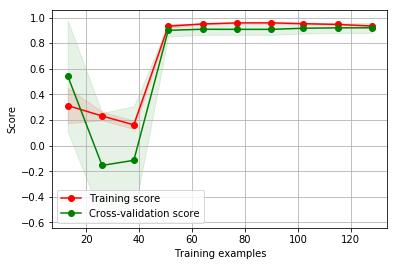

In [90]:
import lcplot
lcplot.plot(model,X,y)

In [91]:
# training
model.fit(X_train, y_train)

# training score
print(model.score(X_train, y_train))

# testing score (validation)
print(model.score(X_test, y_test))

0.9283838690451576
0.9256903423602503


K-Fold cross validation:

- Shuffle data.
- Split into k disjoint, equal parts.
- Run k iterations.
- In each iteration, use 1 part for testing and the other (k-1) parts for training.

"Fairness:" every data point is tested exactly once.

In [92]:
from sklearn.model_selection import KFold, ShuffleSplit

In [93]:
KFold, ShuffleSplit

(sklearn.model_selection._split.KFold,
 sklearn.model_selection._split.ShuffleSplit)